[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
74/74 [==============================] - 5s 33ms/step - loss: 0.0032
Epoch 2/10
74/74 [==============================] - 2s 33ms/step - loss: 1.9780e-04
Epoch 3/10
74/74 [==============================] - 3s 36ms/step - loss: 1.8757e-04
Epoch 4/10
74/74 [==============================] - 3s 36ms/step - loss: 2.0223e-04
Epoch 5/10
74/74 [==============================] - 2s 33ms/step - loss: 1.5813e-04
Epoch 6/10
74/74 [==============================] - 2s 33ms/step - loss: 1.5633e-04
Epoch 7/10
74/74 [==============================] - 2s 33ms/step - loss: 1.5774e-04
Epoch 8/10
74/74 [==============================] - 3s 39ms/step - loss: 1.6520e-04
Epoch 9/10
74/74 [==============================] - 2s 33ms/step - loss: 1.3659e-04
Epoch 10/10
19/19 [==============================] - 1s 9ms/step


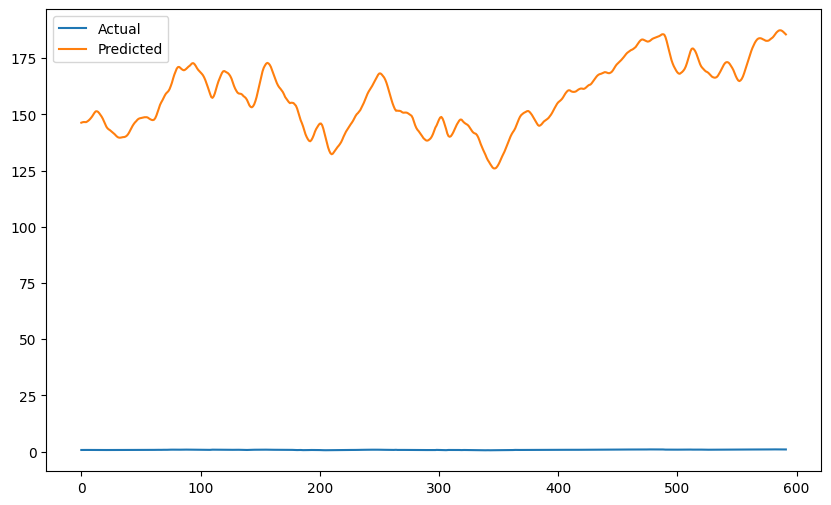

In [11]:
# we need to import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

# Fetching stock data (Example: Apple Inc.)
stock_data = yf.download('AAPL', start='2012-01-01', end='2023-12-31')

# Considering 'Close' prices for prediction
data = pd.DataFrame(stock_data, columns=['Close'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

# Create sequences and labels
sequence_length = 60  # Sequence length, representing the number of days to look back
sequences = []
labels = []

for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i+sequence_length])
    labels.append(scaled_data[i+sequence_length])

# Convert sequences and labels to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split data into training and testing sets
split_ratio = 0.8
split = int(split_ratio * len(sequences))

X_train = sequences[:split]
X_test = sequences[split:]
y_train = labels[:split]
y_test = labels[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predictions
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)  # Inverse scaling to get original prices

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.legend()
plt.show()

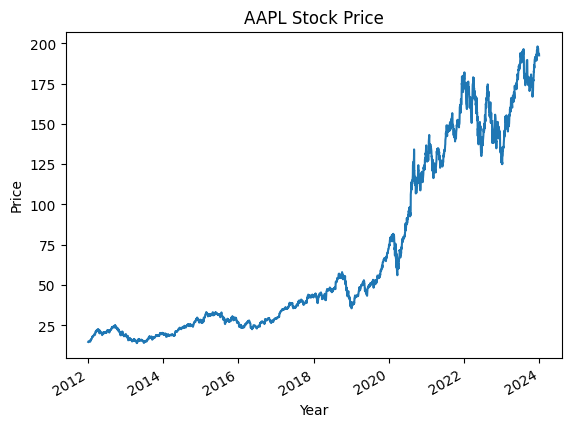

In [ ]:
# show closing stock price in graph
data['Close'].plot()
plt.title('AAPL Stock Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()
